# DSAP: Demographic Similarity from Auxiliary Profiles

DSAP (Demographic Similarity from Auxiliary Profiles) is a two-step methodology for comparing the demographic composition of two datasets. DSAP can be deployed in three key applications: to detect and characterize demographic blind spots and bias issues across datasets, to measure dataset demographic bias in single datasets, and to measure dataset demographic shift in deployment scenarios. An essential feature of DSAP is its ability to robustly analyze datasets without explicit demographic labels, offering simplicity and interpretability for a wide range of situations.

## Environment

In [1]:
import pandas as pd
import itertools

import profile_generation
import dataset_comparison
import auxiliary_model

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
vocabulary = ['neutral', 'happy', 'sad', 'angry', 'fear', 'surprise', 'disgust']

## Application 1: Direct demographic comparison

The following code applies DSAP to measure the difference between two dataset on a particular axis.

In [5]:
dataset1 = 'affectnet'
dataset2 = 'sfew'
axis = 'race'

profile1 = auxiliary_model.load_axis_profile(dataset1, axis)
display(f'Demographic axis profile of [{dataset1}] on "{axis}"')
display(profile1)

profile2 = auxiliary_model.load_axis_profile(dataset2, axis)
display(f'Demographic axis profile of [{dataset2}] on "{axis}"')
display(profile2)

similarity = dataset_comparison.ds(profile1, profile2)

display(f'Similarity between [{dataset1}] and [{dataset2}] on axis "{axis}": {similarity}')

'Demographic axis profile of [affectnet] on "race"'

race
Southeast Asian    0.014161
Indian             0.018883
East Asian         0.058133
Middle Eastern     0.065331
Black              0.072518
Latino_Hispanic    0.090193
White              0.680779
dtype: float64

'Demographic axis profile of [sfew] on "race"'

race
Indian             0.004032
Southeast Asian    0.005645
Latino_Hispanic    0.011290
East Asian         0.031855
Black              0.037500
Middle Eastern     0.050000
White              0.859677
dtype: float64

'Similarity between [affectnet] and [sfew] on axis "race": 0.821101791446269'

Between multiple datasets, we can generate a similarity matrix and a clustering like so:

In [6]:
axis = 'race'
axis = ['age', 'race', 'gender']
ax_profiles = {}

for dataset in [
    'adfes', 
    'affectnet', 
    'caer-s', 
    'ck', 
    'ck+', 
    'expw', 
    'fer2013', 
    'ferplus', 
    'gemep', 
    'isafe', 
    'jaffe', 
    'kdef', 
    'liris-cse', 
    'mmafedb', 
    'mug', 
    'nhfier', 
    'oulu-casia', 
    'raf-db2', 
    'sfew', 
    'wsefep', 
]:
    ax_profiles[dataset] = auxiliary_model.load_axis_profile(dataset, axis)

display(f'Loaded {len(ax_profiles)} axis profiles for axis "{axis}"')

'Loaded 20 axis profiles for axis "[\'age\', \'gender\', \'race\']"'

In [8]:
def generate_distance_matrix(ax_profiles):
    simil = {}
    for dataset1, dataset2 in itertools.combinations(ax_profiles.keys(), 2):
        simil[(dataset1, dataset2)] = dataset_comparison.ds(ax_profiles[dataset1], 
                                                            ax_profiles[dataset2])

    ct = pd.crosstab(ax_profiles.keys(), ax_profiles.keys(), rownames=[None], colnames=[None])
    
    ct[:] = 1
    for (n1, n2), b in simil.items():
        ct.loc[n2, n1] = b
        ct.loc[n1, n2] = b
    return ct

similarity_matrix = generate_distance_matrix(ax_profiles)
display(similarity_matrix)

,adfes,affectnet,caer-s,ck,ck+,expw,fer2013,ferplus,gemep,isafe,jaffe,kdef,liris-cse,mmafedb,mug,nhfier,oulu-casia,raf-db2,sfew,wsefep
adfes,1.000000,0.307626,0.358345,0.509123,0.497039,0.265227,0.300774,0.300265,2.872078e-01,6.358503e-02,0.000000,0.382268,0.000000,0.282051,0.486721,0.318835,0.301860,0.305050,0.322947,6.151515e-01
affectnet,0.307626,1.000000,0.518485,0.465970,0.479576,0.844977,0.884896,0.884068,4.917158e-01,4.230795e-02,0.030925,0.411296,0.056789,0.836429,0.449687,0.833321,0.383021,0.799576,0.680436,3.933670e-01
caer-s,0.358345,0.518485,1.000000,0.643119,0.631693,0.510111,0.547125,0.546770,4.471931e-01,6.665998e-03,0.006408,0.650216,0.012988,0.537565,0.697702,0.541238,0.309165,0.534558,0.545888,6.141214e-01
ck,0.509123,0.465970,0.643119,1.000000,0.930492,0.380256,0.472848,0.472242,3.555573e-01,5.855601e-02,0.000000,0.679528,0.014894,0.393396,0.592231,0.488244,0.372072,0.435617,0.428921,7.319149e-01
ck+,0.497039,0.479576,0.631693,0.930492,1.000000,0.395955,0.491736,0.491358,3.517980e-01,5.764328e-02,0.007485,0.661221,0.016357,0.409234,0.585686,0.510098,0.374219,0.444739,0.436122,6.850568e-01
expw,0.265227,0.844977,0.510111,0.380256,0.395955,1.000000,0.819141,0.818541,4.490073e-01,3.022546e-02,0.036679,0.348692,0.058396,0.949318,0.436768,0.772827,0.423575,0.771233,0.648129,3.273579e-01
fer2013,0.300774,0.884896,0.547125,0.472848,0.491736,0.819141,1.000000,0.997597,4.852674e-01,3.116601e-02,0.036542,0.444189,0.081237,0.846395,0.473499,0.865857,0.393845,0.835054,0.668966,4.238003e-01
ferplus,0.300265,0.884068,0.546770,0.472242,0.491358,0.818541,0.997597,1.000000,4.847958e-01,3.103480e-02,0.036513,0.443156,0.081260,0.845684,0.472274,0.865113,0.393049,0.835625,0.668176,4.235699e-01
gemep,0.287208,0.491716,0.447193,0.355557,0.351798,0.449007,0.485267,0.484796,1.000000e+00,1.110223e-16,0.000000,0.493487,0.000000,0.453266,0.431852,0.550252,0.350885,0.436515,0.696297,3.938551e-01
isafe,0.063585,0.042308,0.006666,0.058556,0.057643,0.030225,0.031166,0.031035,1.110223e-16,1.000000e+00,0.000000,0.000000,0.000000,0.024606,0.019843,0.035083,0.000000,0.035700,0.006855,1.110223e-16


In [9]:
clustering = dataset_comparison.dataset_clustering(similarity_matrix)
display(clustering.assignation)

isafe         A
jaffe         B
liris-cse     C
nhfier        D
affectnet     D
fer2013       D
ferplus       D
raf-db2       D
expw          D
mmafedb       D
adfes         E
oulu-casia    F
gemep         G
sfew          H
caer-s        I
mug           I
ck            J
ck+           J
kdef          J
wsefep        J
dtype: object

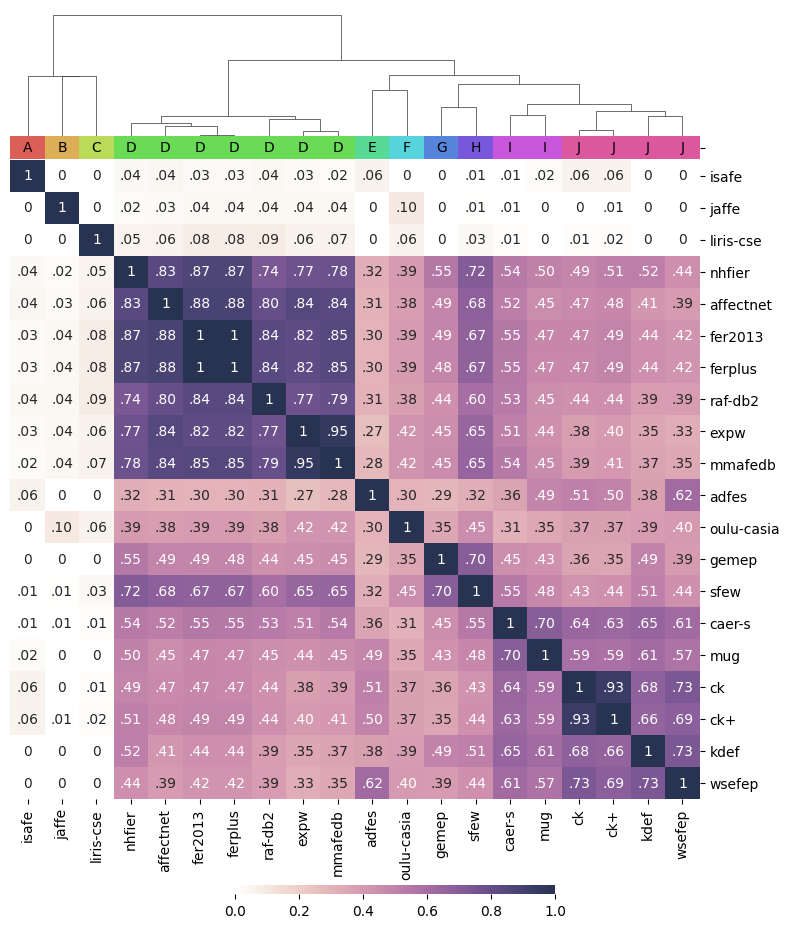

In [10]:
dataset_comparison.plot_similarity_matrix(similarity_matrix, clustering)

## Application 2: Bias measurement

In [11]:
dataset = 'affectnet'
axis = 'race'

profile = auxiliary_model.load_axis_profile(dataset, axis)
display(f'Demographic axis profile of [{dataset}] on "{axis}"')
display(profile)

rep = dataset_comparison.ds_representational(profile)

display(f'DSAP based representational bias for [{dataset}] on axis "{axis}": {rep}')

'Demographic axis profile of [affectnet] on "race"'

race
Southeast Asian    0.014161
Indian             0.018883
East Asian         0.058133
Middle Eastern     0.065331
Black              0.072518
Latino_Hispanic    0.090193
White              0.680779
dtype: float64

'DSAP based representational bias for [affectnet] on axis "race": 0.4620779320560351'

In [12]:
dataset = 'jaffe'
axis = 'race'

profile = auxiliary_model.load_axis_profile(dataset, axis)
display(f'Demographic axis profile of [{dataset}] on "{axis}"')
display(profile)

rep = dataset_comparison.ds_representational(profile)
even = dataset_comparison.ds_evenness(profile)

display(f'DSAP based evenness for [{dataset}] on axis "{axis}": {even}')
display(f'DSAP based representational for the same case: {rep}')

'Demographic axis profile of [jaffe] on "race"'

race
White              0.000000
Middle Eastern     0.000000
Latino_Hispanic    0.000000
Indian             0.000000
Black              0.000000
Southeast Asian    0.213542
East Asian         0.786458
dtype: float64

'DSAP based evenness for [jaffe] on axis "race": 0.7135416666666666'

'DSAP based representational for the same case: 0.2857142857142858'

In [13]:
dataset = 'fer2013'
axis = 'gender'

demographic_info = auxiliary_model.load_demographic_info(dataset)

stereo = dataset_comparison.ds_stereotypical(demographic_info, 
                                             axis, auxiliary_model.get_groups(axis), 
                                             'label', vocabulary)

display(f'DSAP based stereotypical bias for [{dataset}] on axis "{axis}": {stereo}')

'DSAP based stereotypical bias for [fer2013] on axis "gender": 0.9227884945405338'

In [14]:
axis = 'race'
axis = ['age', 'race', 'gender']
ax_profiles = {}

for dataset in [
    'adfes', 
    'affectnet', 
    'caer-s', 
    'ck', 
    'ck+', 
    'expw', 
    'fer2013', 
    'ferplus', 
    'gemep', 
    'isafe', 
    'jaffe', 
    'kdef', 
    'liris-cse', 
    'mmafedb', 
    'mug', 
    'nhfier', 
    'oulu-casia', 
    'raf-db2', 
    'sfew', 
    'wsefep', 
]:
    ax_profiles[dataset] = auxiliary_model.load_axis_profile(dataset, axis)

display(f'Loaded {len(ax_profiles)} axis profiles for axis "{axis}"')

'Loaded 20 axis profiles for axis "[\'age\', \'gender\', \'race\']"'

In [15]:
def generate_bias_table(ax_profiles, axis):
    bias_table = {}
    
    for dataset, profile in ax_profiles.items():
        demographic_info = auxiliary_model.load_demographic_info(dataset)
        bias_table[dataset] = {
            r"Representational ($DS_R$)": dataset_comparison.ds_representational(profile),
            r"Evenness ($DS_E$)": dataset_comparison.ds_evenness(profile),
            r"Stereotypical ($DS_S$)": dataset_comparison.ds_stereotypical(demographic_info, 
                                                                         axis, auxiliary_model.get_groups(axis), 
                                                                         'label', vocabulary),
        }
    bias_table = pd.DataFrame(bias_table).T
    return bias_table

bias_table = generate_bias_table(ax_profiles, axis)
display(bias_table)

,Representational ($DS_R$),Evenness ($DS_E$),Stereotypical ($DS_S$)
adfes,0.055556,0.649351,1.000000
affectnet,0.377184,0.377184,0.829283
caer-s,0.155427,0.212179,0.899529
ck,0.135005,0.454965,0.875199
ck+,0.156094,0.443618,0.870634
expw,0.404736,0.406450,0.849008
fer2013,0.361297,0.361297,0.807499
ferplus,0.361577,0.361577,0.782372
gemep,0.063492,0.903665,0.767206
isafe,0.063492,0.526917,0.865596


## Application 3: Demographic dataset shift detection

In [17]:
axes = ['age', 'race', 'gender', ['age', 'gender', 'race']]
datasets = ['affectnet', 'caer-s', 'fer2013', 'ferplus', 'mmafedb', 'raf-db2', 'sfew']

def batch_load_profiles_traintest(datasets, axes):
    ax_profiles = {}
    
    for dataset in datasets:
        ax_profiles[dataset] = dict([(str(axis)+'-train', auxiliary_model.load_axis_profile(dataset, axis, 'train')) for axis in axes] +
                                    [(str(axis)+'-test', auxiliary_model.load_axis_profile(dataset, axis, 'val')) for axis in axes])
    
    return ax_profiles

ax_profiles = batch_load_profiles_traintest(datasets, axes)
display(f'Loaded {len(ax_profiles)} demographic profiles')

'Loaded 7 demographic profiles'

<Axes: >

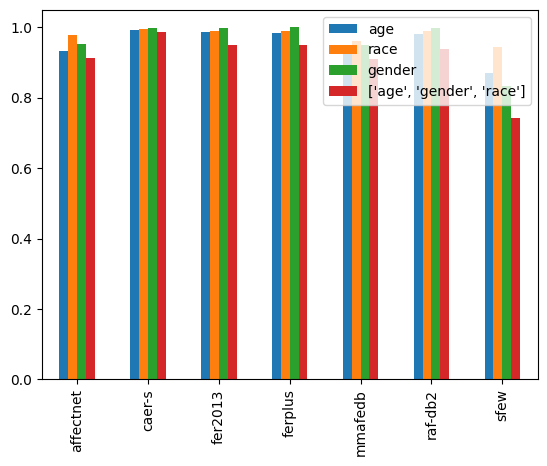

In [18]:
dataset_shift = {}

for dataset in ax_profiles.keys():
    dataset_shift[dataset] = dict([(str(axis), dataset_comparison.ds(ax_profiles[dataset][str(axis)+'-train'],
                                                                    ax_profiles[dataset][str(axis)+'-test'])) for axis in axes])

dataset_shift = pd.DataFrame(dataset_shift).T
dataset_shift.plot(kind="bar")